In [127]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
import pyarrow as pa
from datetime import datetime
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import tensorflow as tf
import distutils as _distutils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
import shap

CPU times: total: 0 ns
Wall time: 2.07 ms


In [128]:
data = pd.read_csv(r"E:\Andy\Loan_Prediction_Dataset.csv")

In [129]:
data.head(3)

,Loan_id,Customer_id,Gender,Dependants,Education,Employment_status,Days_from_birth,Marital_status,Politically_Exposed_person,Type_of_loan,Maximum_Days_past_due_on_previous_loans,Place_of_residence,Monthly_income(Ugx),Loan_Amount_Requested,Customer_Type,Disbursement_Date,Tenure,Approval_status
0,5008804,337525,M,0,Higher education,Working,12005.0,Civil marriage,Y,AUTO LOAN,2,Rented apartment,4275000.0,6150000.0,Business,24/05/2015,25,Approved
1,5008805,358141,M,0,Higher education,Working,12005.0,Civil marriage,Y,BUSINESS GROWTH LOAN,14,Rented apartment,4275000.0,2416000.0,Business,12/11/2021,25,Approved
2,5008806,66393,M,0,Secondary / secondary special,Working,21474.0,Married,Y,CONTRACT FINANCE,20,House / apartment,1125000.0,2446000.0,Security staff,12/06/2022,23,Approved


In [130]:
data.tail(4)

,Loan_id,Customer_id,Gender,Dependants,Education,Employment_status,Days_from_birth,Marital_status,Politically_Exposed_person,Type_of_loan,Maximum_Days_past_due_on_previous_loans,Place_of_residence,Monthly_income(Ugx),Loan_Amount_Requested,Customer_Type,Disbursement_Date,Tenure,Approval_status
438553,6840222,154235,F,0,Secondary / secondary special,Working,15939.0,Single / not married,N,BUSINESS GROWTH LOAN,173,House / apartment,1035000.0,3745645.0,Laborers,27/06/2022,32,Approved
438554,6841878,699982,F,0,Higher education,Commercial associate,8169.0,Single / not married,N,MORTGAGE,49,With parents,540000.0,5001671.0,Sales staff,08/04/2016,17,Approved
438555,6842765,751719,F,0,Secondary / secondary special,Pensioner,21673.0,Married,Y,CREDIT CARD LOAN,11,House / apartment,720000.0,3751299.0,Business,25/10/2021,21,Approved
438556,6842885,217208,F,0,Secondary / secondary special,Working,18858.0,Married,Y,LEASE FINANCE,20,House / apartment,1215000.0,2022900.0,Sales staff,30/08/2023,29,Approved


In [131]:
data.shape

(438557, 18)

In [132]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 438557
Number of Columns 18


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Loan_id                                  438557 non-null  object 
 1   Customer_id                              438557 non-null  object 
 2   Gender                                   438557 non-null  object 
 3   Dependants                               438557 non-null  int64  
 4   Education                                438557 non-null  object 
 5   Employment_status                        438557 non-null  object 
 6   Days_from_birth                          438233 non-null  float64
 7   Marital_status                           438557 non-null  object 
 8   Politically_Exposed_person               438557 non-null  object 
 9   Type_of_loan                             438557 non-null  object 
 10  Maximum_Days_past_due_on_previou

In [134]:
data['Approval_status'].value_counts()

Approval_status
Approved    391102
Declined     47455
Name: count, dtype: int64

In [135]:
#Checking null values
data.isnull().sum()

Loan_id                                      0
Customer_id                                  0
Gender                                       0
Dependants                                   0
Education                                    0
Employment_status                            0
Days_from_birth                            324
Marital_status                               0
Politically_Exposed_person                   0
Type_of_loan                                 0
Maximum_Days_past_due_on_previous_loans      0
Place_of_residence                           0
Monthly_income(Ugx)                          7
Loan_Amount_Requested                      153
Customer_Type                                0
Disbursement_Date                            0
Tenure                                       0
Approval_status                              0
dtype: int64

In [136]:
data.isnull().sum()*100 / len(data)

Loan_id                                    0.000000
Customer_id                                0.000000
Gender                                     0.000000
Dependants                                 0.000000
Education                                  0.000000
Employment_status                          0.000000
Days_from_birth                            0.073879
Marital_status                             0.000000
Politically_Exposed_person                 0.000000
Type_of_loan                               0.000000
Maximum_Days_past_due_on_previous_loans    0.000000
Place_of_residence                         0.000000
Monthly_income(Ugx)                        0.001596
Loan_Amount_Requested                      0.034887
Customer_Type                              0.000000
Disbursement_Date                          0.000000
Tenure                                     0.000000
Approval_status                            0.000000
dtype: float64

In [137]:
data['Days_from_birth'] = data['Days_from_birth'].fillna(data['Days_from_birth'].mean())
data['Monthly_income(Ugx)'] = data['Monthly_income(Ugx)'].fillna(data['Days_from_birth'].mode()[0])
data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].fillna(data['Loan_Amount_Requested'].mean())

In [138]:
data['Age'] = round(data['Days_from_birth'].astype(float)/ 365,1)

In [139]:
#Drop Days_from_birth, To remove colinearity
cols = ['Days_from_birth']
data = data.drop(columns=cols, axis=1)

In [140]:
# Summary statistics of numerical variables
data.describe()

,Dependants,Maximum_Days_past_due_on_previous_loans,Monthly_income(Ugx),Loan_Amount_Requested,Tenure,Age
count,438557.000000,438557.000000,4.385570e+05,4.385570e+05,438557.000000,438557.000000
mean,0.427390,69.170496,1.875225e+06,3.984501e+06,21.050424,43.838264
std,0.724882,81.556532,1.100889e+06,1.786504e+06,8.940901,11.459873
min,0.000000,0.000000,1.600090e+04,8.940000e+05,6.000000,20.500000
25%,0.000000,13.000000,1.215000e+06,2.435265e+06,13.000000,34.300000
50%,0.000000,26.000000,1.607805e+06,3.984457e+06,21.000000,42.800000
75%,1.000000,108.000000,2.250000e+06,5.535134e+06,29.000000,53.400000
max,19.000000,330.000000,6.750000e+07,7.082000e+06,36.000000,69.000000


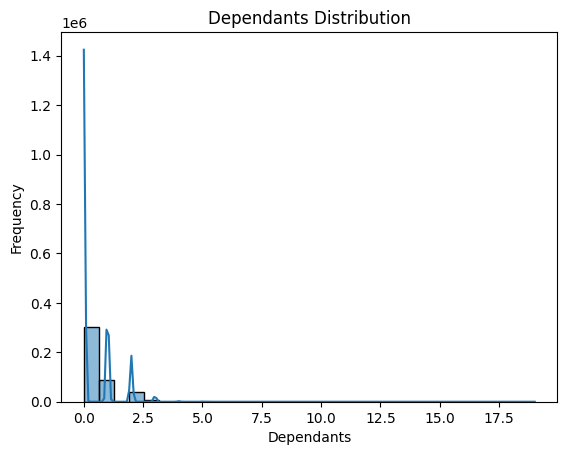

In [141]:
# Distribution of Dependants
sns.histplot(data['Dependants'], bins=30, kde=True)
plt.title('Dependants Distribution')
plt.xlabel('Dependants')
plt.ylabel('Frequency')
plt.show()

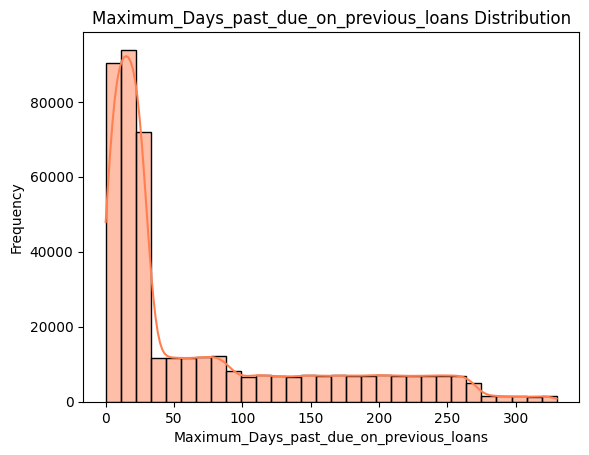

In [142]:
# Distribution of Days in arrears
sns.histplot(data['Maximum_Days_past_due_on_previous_loans'], bins=30, kde=True, color='#FF7F50')
plt.title('Maximum_Days_past_due_on_previous_loans Distribution')
plt.xlabel('Maximum_Days_past_due_on_previous_loans')
plt.ylabel('Frequency')
plt.show()

In [143]:
data['Monthly_income in Millions'] = data['Monthly_income(Ugx)']/1000000

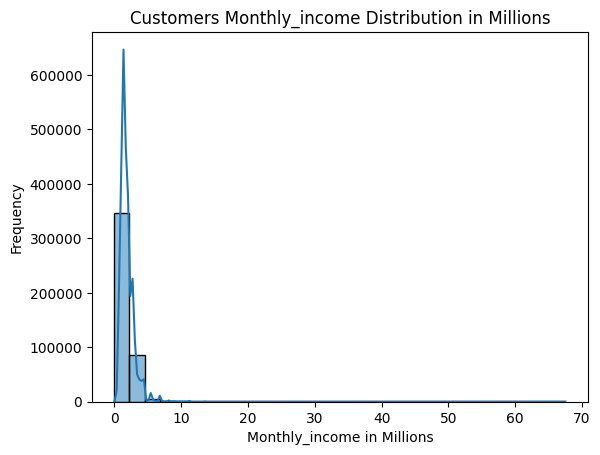

In [144]:
#Distribution of Income
sns.histplot(data['Monthly_income in Millions'], bins=30, kde=True)
plt.title('Customers Monthly_income Distribution in Millions')
plt.xlabel('Monthly_income in Millions')
plt.ylabel('Frequency')
plt.show()

In [145]:
#Drop DMonthly_income in Millions, To remove colinearity
col = ['Monthly_income in Millions']
data = data.drop(columns=col, axis=1)

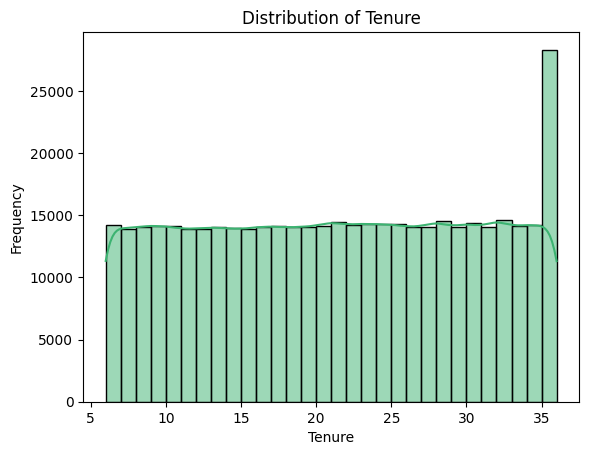

In [146]:
#Distribution of Tenure
sns.histplot(data['Tenure'], bins=30, kde=True,color= '#3CB371')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

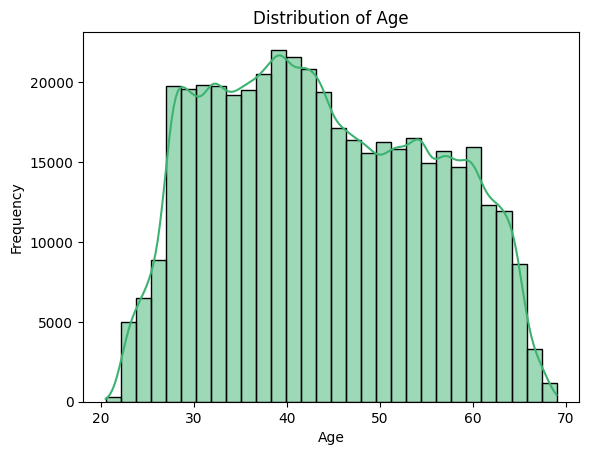

In [147]:
#Distribution of Tenure
sns.histplot(data['Age'], bins=30, kde=True, color= '#3CB371')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [148]:
data['Loan_Amount_in_millions'] = data['Loan_Amount_Requested']/1000000

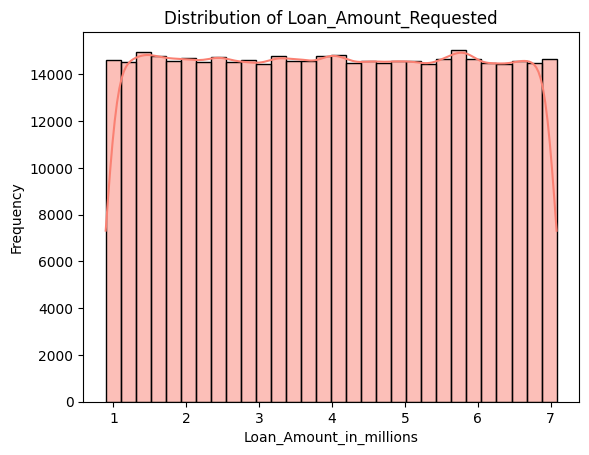

In [149]:
#Distribution of Loan_Amount_Requested
sns.histplot(data['Loan_Amount_in_millions'], bins=30, kde=True, color= 'salmon')
plt.title('Distribution of Loan_Amount_Requested')
plt.xlabel('Loan_Amount_in_millions')
plt.ylabel('Frequency')
plt.show()

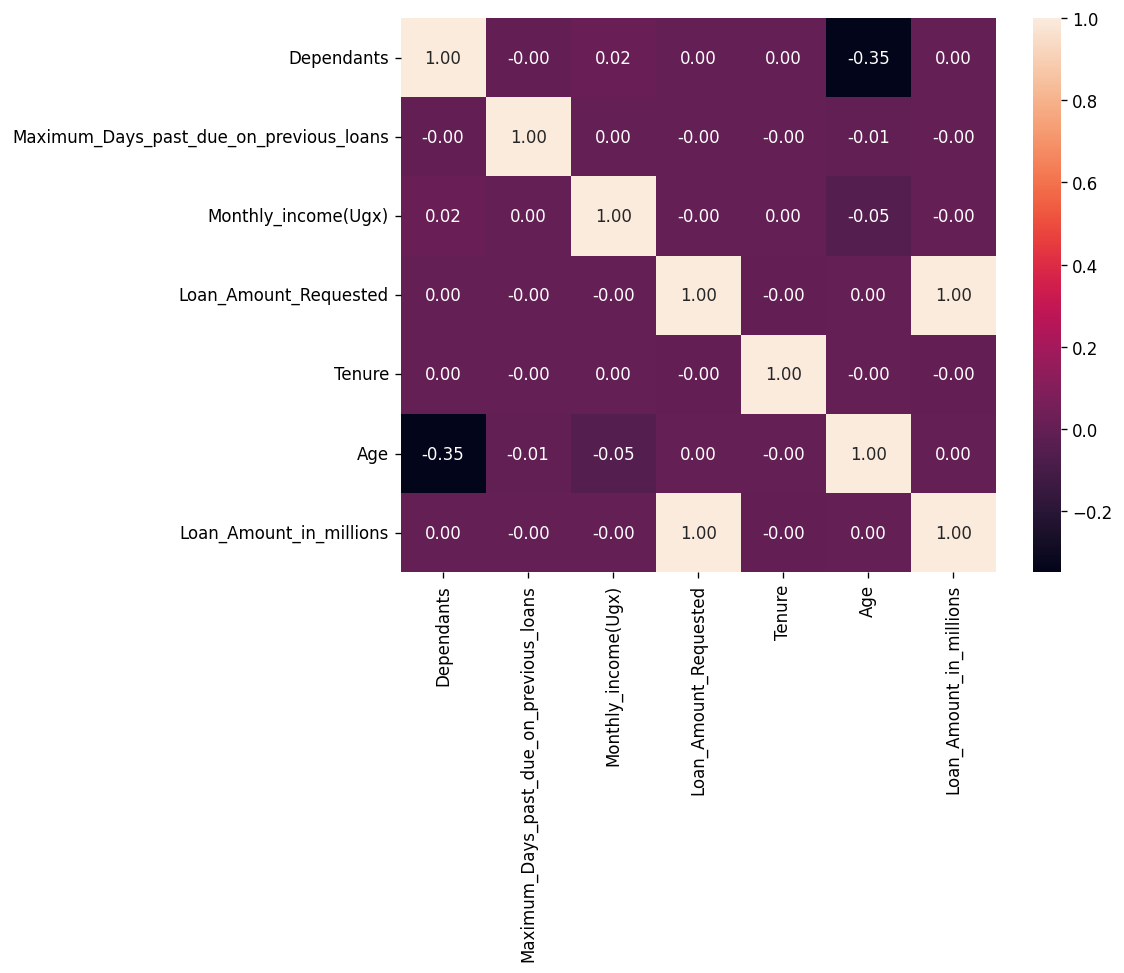

In [150]:
#Correlation matrix for numerical values
numerical_data = data.select_dtypes(include=['int', 'float'])
correlation_matrix = numerical_data.corr()

# Heatmap of correlation matrix
fig = plt.figure(figsize=(8,6), dpi = 120)
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f')
#plt.title('Correlation Heatmap')
plt.show()

In [151]:
# Define function to classify credit risk
def classify_credit_risk(days):
    if days >=180:
        return "Write_off"
    elif 90<=days<180:
        return "Doubtful"
    elif 60<=days<90:
        return "Substandard"
    elif 30<=days<60:
        return "Watch"
    elif 1<=days<30:
        return "Normal"
    else:
        return "Standard"
# Apply function to create 'Credit_risk_classification' column
data['Credit_risk_classification'] = data['Maximum_Days_past_due_on_previous_loans'].apply(classify_credit_risk)

In [152]:
result = data['Credit_risk_classification'].value_counts()
df = result.reset_index(name = 'count')
#Add percentages column
df['percentage'] = round(df['count'] * 100/ df['count'].sum(),2)
print(df)

  Credit_risk_classification   count  percentage
0                     Normal  243185       55.45
1                  Write_off   65122       14.85
2                   Doubtful   56318       12.84
3                      Watch   33496        7.64
4                Substandard   32286        7.36
5                   Standard    8150        1.86


C:\Users\abyaruhanga\AppData\Local\Temp\ipykernel_9196\3094395830.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Credit_risk_classification', y='percentage', palette=colors)


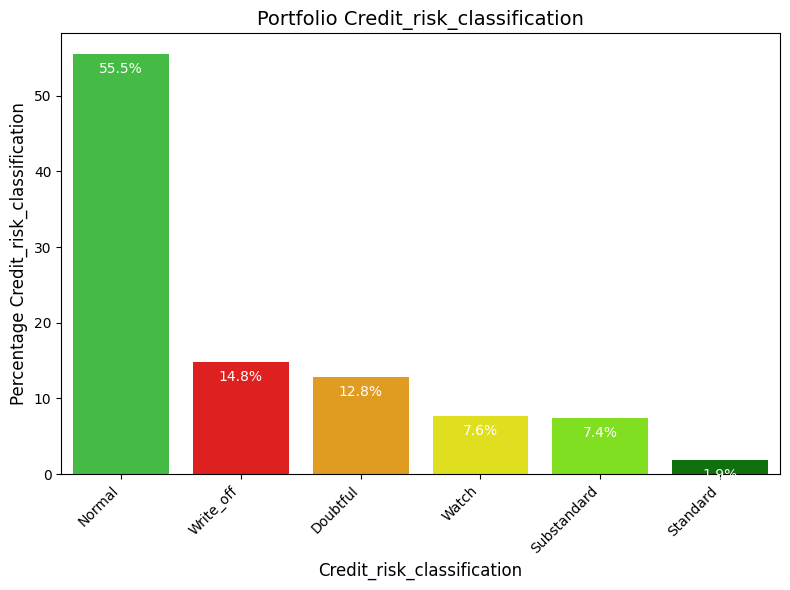

In [153]:
# Plot the histogram
colors = ['#32CD32','red','orange','yellow','chartreuse','green']
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Credit_risk_classification', y='percentage', palette=colors)

# Annotate each bar with the number of orders inside the bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height - 2.5, f"{round(float(height),1)}%", ha="center", fontsize=10, color='white')

# Customize plot labels and title
plt.xlabel('Credit_risk_classification', fontsize=12)
plt.ylabel('Percentage Credit_risk_classification', fontsize=12)
plt.title('Portfolio Credit_risk_classification', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [154]:
data['Disbursement_Date'] = pd.to_datetime(data['Disbursement_Date'], errors='coerce')
data['Year'] = data['Disbursement_Date'].dt.year

C:\Users\abyaruhanga\AppData\Local\Temp\ipykernel_9196\4027632946.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Disbursement_Date'] = pd.to_datetime(data['Disbursement_Date'], errors='coerce')


In [155]:
data['Year'].value_counts()

Year
2018    56318
2015    55347
2022    54994
2021    53433
2019    50371
2023    48849
2017    47160
2016    41305
2020    30780
Name: count, dtype: int64

In [156]:
classification_counts = data.groupby(['Credit_risk_classification','Year']).size().reset_index(name='Count')
print(classification_counts)

   Credit_risk_classification  Year  Count
0                    Doubtful  2015   6235
1                    Doubtful  2016   6264
2                    Doubtful  2017   6354
3                    Doubtful  2018   6171
4                    Doubtful  2019   6342
5                    Doubtful  2020   5451
6                    Doubtful  2021   6340
7                    Doubtful  2022   6914
8                    Doubtful  2023   6247
9                      Normal  2015  33374
10                     Normal  2016  19860
11                     Normal  2017  25278
12                     Normal  2018  34315
13                     Normal  2019  28584
14                     Normal  2020  14745
15                     Normal  2021  31549
16                     Normal  2022  28405
17                     Normal  2023  27075
18                   Standard  2015   1197
19                   Standard  2016    678
20                   Standard  2017    828
21                   Standard  2018   1165
22         

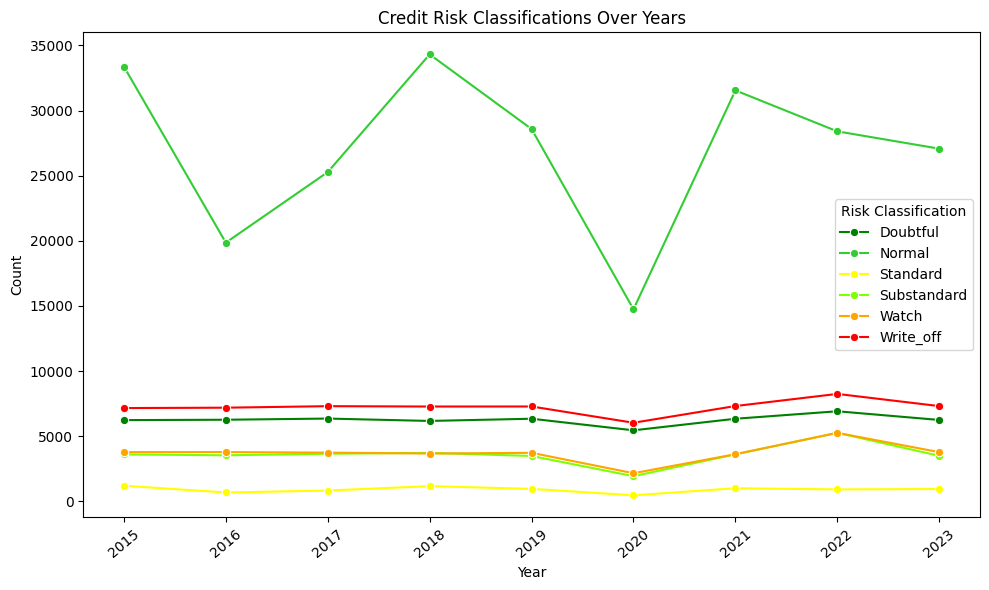

In [157]:
# Plot the data
custom_colors = {'Standard': 'green','Normal': '#32CD32', 'Watch': 'yellow', 'Substandard':'chartreuse','Doubtful': 'orange', 'Write_off': 'red'}
plt.figure(figsize=(10, 6))
sns.lineplot(data=classification_counts, x='Year', y='Count', hue='Credit_risk_classification', marker='o', palette=custom_colors.values())
plt.title('Credit Risk Classifications Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Risk Classification')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

In [158]:
# Define function to bucket Age
def classify_Age(number):
    if number > 40:
        return 'Age > 40'
    elif 30 <= number <= 40:
        return 'Age 30 to 40'
    elif 20 <= number < 30:
        return 'Age 20 to 30'
    else:
        return 'Age < 20'

# Apply function to create 'Age_Bracket' column
data['Age_Bracket'] = data['Age'].apply(classify_Age)

In [159]:
Age_bracket_counts = data.groupby(['Credit_risk_classification','Age_Bracket']).size().reset_index(name='Count')
print(Age_bracket_counts)

   Credit_risk_classification   Age_Bracket   Count
0                    Doubtful  Age 20 to 30    7590
1                    Doubtful  Age 30 to 40   15951
2                    Doubtful      Age > 40   32777
3                      Normal  Age 20 to 30   31376
4                      Normal  Age 30 to 40   69874
5                      Normal      Age > 40  141935
6                    Standard  Age 20 to 30    1029
7                    Standard  Age 30 to 40    2268
8                    Standard      Age > 40    4853
9                 Substandard  Age 20 to 30    4300
10                Substandard  Age 30 to 40    9337
11                Substandard      Age > 40   18649
12                      Watch  Age 20 to 30    4445
13                      Watch  Age 30 to 40    9707
14                      Watch      Age > 40   19344
15                  Write_off  Age 20 to 30    8591
16                  Write_off  Age 30 to 40   18743
17                  Write_off      Age > 40   37788


In [160]:
pivot_dat = Age_bracket_counts.pivot(index='Credit_risk_classification', columns='Age_Bracket', values='Count')

<Figure size 1200x800 with 0 Axes>

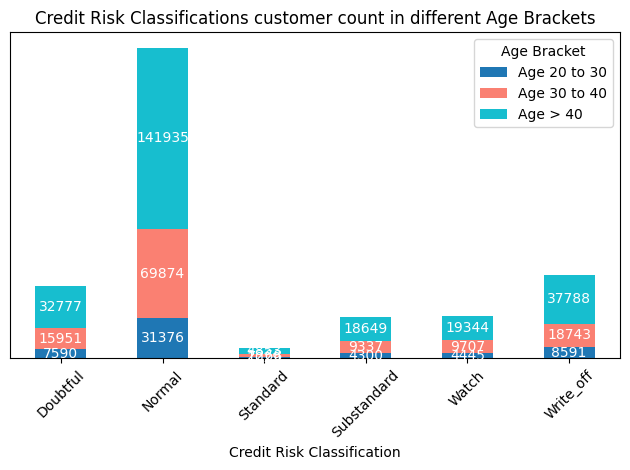

In [161]:
custom_colors = ['#1f77b4','salmon', '#17becf']
plt.figure(figsize=(12, 8))
ax = pivot_dat.plot(kind='bar', stacked=True,color=custom_colors)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d',color='white')
plt.title('Credit Risk Classifications customer count in different Age Brackets')
plt.xlabel('Credit Risk Classification')
#plt.ylabel('Count')
plt.legend(title='Age Bracket')
plt.xticks(rotation=45)
# Hide the y-axis
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

In [162]:
data.head()

,Loan_id,Customer_id,Gender,Dependants,Education,Employment_status,Marital_status,Politically_Exposed_person,Type_of_loan,Maximum_Days_past_due_on_previous_loans,...,Loan_Amount_Requested,Customer_Type,Disbursement_Date,Tenure,Approval_status,Age,Loan_Amount_in_millions,Credit_risk_classification,Year,Age_Bracket
0,5008804,337525,M,0,Higher education,Working,Civil marriage,Y,AUTO LOAN,2,...,6150000.0,Business,2015-05-24,25,Approved,32.9,6.150,Normal,2015,Age 30 to 40
1,5008805,358141,M,0,Higher education,Working,Civil marriage,Y,BUSINESS GROWTH LOAN,14,...,2416000.0,Business,2021-11-12,25,Approved,32.9,2.416,Normal,2021,Age 30 to 40
2,5008806,66393,M,0,Secondary / secondary special,Working,Married,Y,CONTRACT FINANCE,20,...,2446000.0,Security staff,2022-06-12,23,Approved,58.8,2.446,Normal,2022,Age > 40
3,5008808,106968,F,0,Secondary / secondary special,Commercial associate,Single / not married,Y,SALARY LOAN,14,...,5840000.0,Sales staff,2015-11-12,25,Declined,52.4,5.840,Normal,2015,Age > 40
4,5008809,76942,F,0,Secondary / secondary special,Commercial associate,Single / not married,Y,SALARY LOAN,26,...,2318000.0,Sales staff,2018-11-12,25,Declined,52.4,2.318,Normal,2018,Age > 40


In [163]:
Loan_type_classification = data.groupby(['Type_of_loan','Credit_risk_classification']).size().reset_index(name='Count')
print(Loan_type_classification)

   Type_of_loan Credit_risk_classification  Count
0     AUTO LOAN                   Doubtful    396
1     AUTO LOAN                     Normal   1652
2     AUTO LOAN                   Standard     55
3     AUTO LOAN                Substandard    235
4     AUTO LOAN                      Watch    232
..          ...                        ...    ...
73   TERM LOAN                      Normal   2178
74   TERM LOAN                    Standard     78
75   TERM LOAN                 Substandard    281
76   TERM LOAN                       Watch    293
77   TERM LOAN                   Write_off    601

[78 rows x 3 columns]


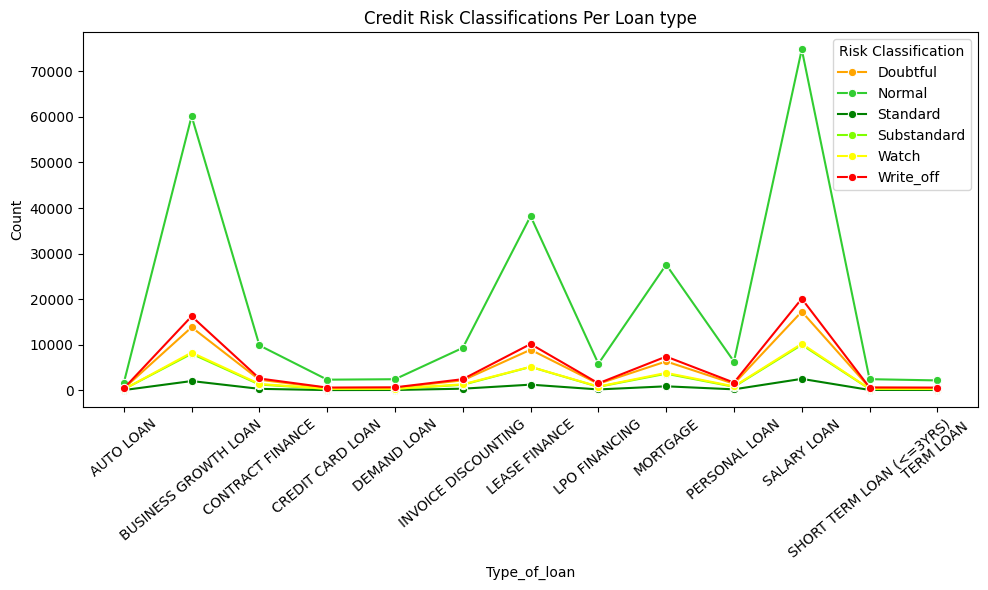

In [164]:
# Plot the data
custom_colors = {'Standard': 'green','Normal': '#32CD32', 'Watch': 'yellow', 'Substandard':'chartreuse','Doubtful': 'orange', 'Write_off': 'red'}
plt.figure(figsize=(10, 6))
sns.lineplot(data=Loan_type_classification, x='Type_of_loan', y='Count', hue='Credit_risk_classification', palette = custom_colors, marker='o')
plt.title('Credit Risk Classifications Per Loan type')
plt.xlabel('Type_of_loan')
plt.ylabel('Count')
plt.legend(title='Risk Classification')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

In [165]:
Education_classification = data.groupby(['Credit_risk_classification','Education']).size().reset_index(name='Count')
print(Education_classification)

   Credit_risk_classification                      Education   Count
0                    Doubtful                Academic degree      38
1                    Doubtful               Higher education   14949
2                    Doubtful              Incomplete higher    1853
3                    Doubtful                Lower secondary     548
4                    Doubtful  Secondary / secondary special   38930
5                      Normal                Academic degree     185
6                      Normal               Higher education   65295
7                      Normal              Incomplete higher    8376
8                      Normal                Lower secondary    2278
9                      Normal  Secondary / secondary special  167051
10                   Standard                Academic degree       5
11                   Standard               Higher education    2137
12                   Standard              Incomplete higher     293
13                   Standard     

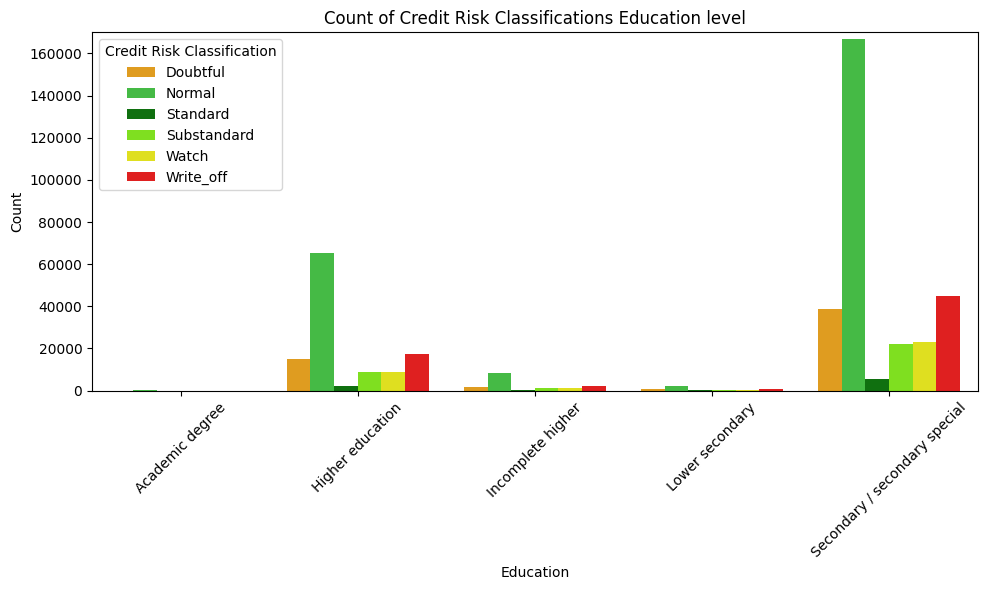

In [166]:
custom_colors = {'Standard': 'green','Normal': '#32CD32', 'Watch': 'yellow', 'Substandard':'chartreuse','Doubtful': 'orange', 'Write_off': 'red'}
plt.figure(figsize=(10, 6))
sns.barplot(data=Education_classification, x='Education', y='Count', hue='Credit_risk_classification',palette=custom_colors)
plt.title('Count of Credit Risk Classifications Education level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Credit Risk Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(-170, 170000)
plt.show()

In [167]:
Time_Approval_classification = data.groupby(['Year','Approval_status']).size().reset_index(name='Count')
print(Time_Approval_classification)

    Year Approval_status  Count
0   2015        Approved  49494
1   2015        Declined   5853
2   2016        Approved  36750
3   2016        Declined   4555
4   2017        Approved  41997
5   2017        Declined   5163
6   2018        Approved  50352
7   2018        Declined   5966
8   2019        Approved  45123
9   2019        Declined   5248
10  2020        Approved  27288
11  2020        Declined   3492
12  2021        Approved  47741
13  2021        Declined   5692
14  2022        Approved  48863
15  2022        Declined   6131
16  2023        Approved  43494
17  2023        Declined   5355


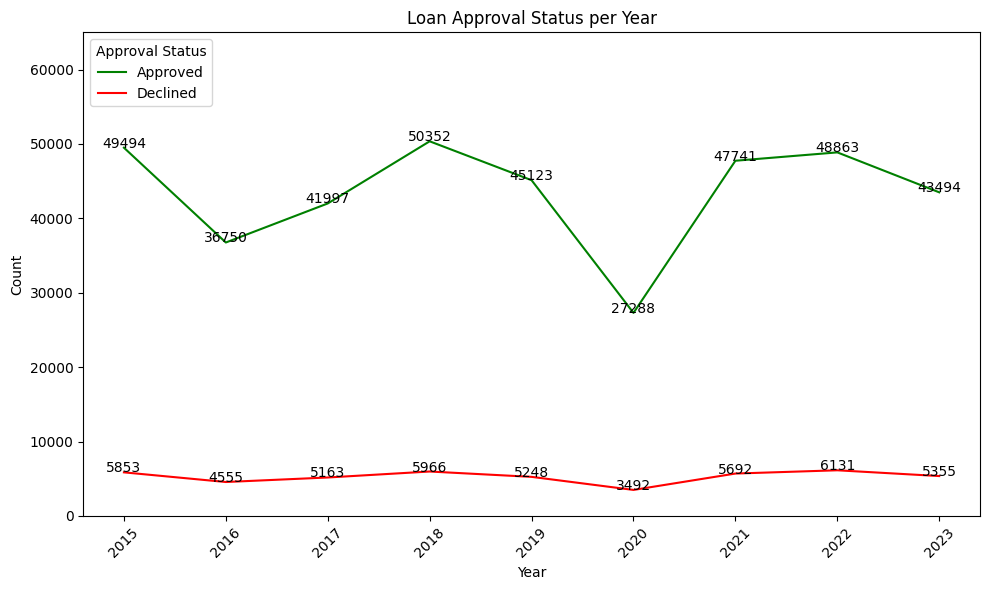

In [168]:
plt.figure(figsize=(10, 6))

# Line plot for "Approved"
sns.lineplot(data=Time_Approval_classification[Time_Approval_classification['Approval_status'] == 'Approved'],
             x='Year', y='Count', color='green', label='Approved',linewidth=1.5)

# Line plot for "Declined"
sns.lineplot(data=Time_Approval_classification[Time_Approval_classification['Approval_status'] == 'Declined'],
             x='Year', y='Count', color='red', label='Declined',linewidth=1.5)

plt.title('Loan Approval Status per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Approval Status', loc='upper left')
plt.xticks(rotation=45)

for index, row in Time_Approval_classification.iterrows():
    if row['Approval_status'] == 'Approved':
        plt.text(row['Year'], row['Count'], str(row['Count']), color='black', fontsize=10, ha='center')
    else:
        plt.text(row['Year'], row['Count'], str(row['Count']), color='black', fontsize=10, ha='center')
plt.tight_layout()
plt.ylim(0, 65000)  # Set the y-axis limits as per your preference
plt.show()

In [169]:
Gender_classification = data.groupby(['Gender', 'Credit_risk_classification']).size().reset_index(name='Count')
print(Gender_classification)

   Gender Credit_risk_classification   Count
0       F                   Doubtful   37882
1       F                     Normal  163254
2       F                   Standard    5535
3       F                Substandard   21512
4       F                      Watch   22384
5       F                  Write_off   43873
6       M                   Doubtful   18436
7       M                     Normal   79931
8       M                   Standard    2615
9       M                Substandard   10774
10      M                      Watch   11112
11      M                  Write_off   21249


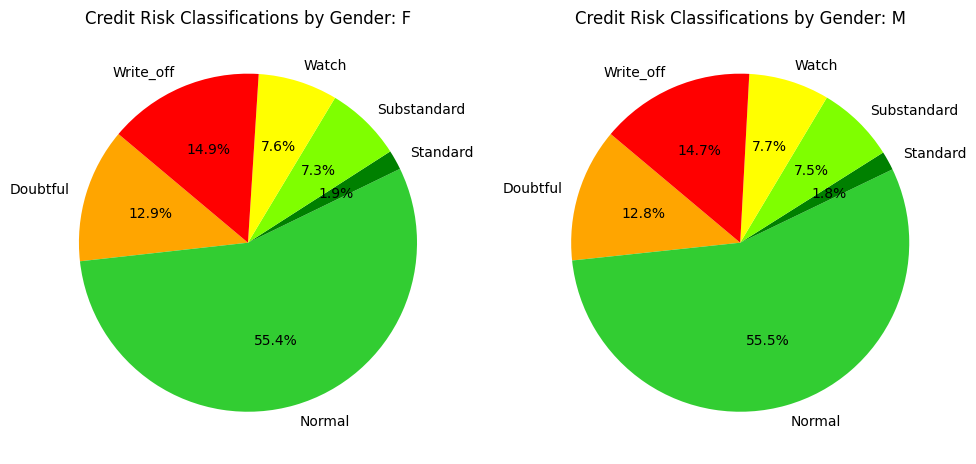

In [170]:
grouped_data = Gender_classification.groupby(['Gender', 'Credit_risk_classification'])['Count'].sum().reset_index()

# Pivot the data for pie chart
pivot_data = grouped_data.pivot(index='Gender', columns='Credit_risk_classification', values='Count')

# Define colors for each category 
colors = {
    'Standard': 'green','Normal': '#32CD32', 'Watch': 'yellow', 'Substandard':'chartreuse','Doubtful': 'orange', 'Write_off': 'red'
}

# Plot the pie chart
plt.figure(figsize=(10, 6))
for i, gender in enumerate(pivot_data.index):
    plt.subplot(1, 2, i+1)
    plt.pie(pivot_data.loc[gender], labels=pivot_data.columns, autopct='%1.1f%%', startangle=140, colors=[colors[col] for col in pivot_data.columns])
    plt.title(f'Credit Risk Classifications by Gender: {gender}')
    
plt.tight_layout()
plt.show()

In [171]:
data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].astype(int)

In [172]:
#Debt to Income ratio
data['DTI'] = round((((data['Loan_Amount_Requested']/data['Tenure']))/data['Monthly_income(Ugx)'])*100,1)

In [173]:
data.sample(3)

,Loan_id,Customer_id,Gender,Dependants,Education,Employment_status,Marital_status,Politically_Exposed_person,Type_of_loan,Maximum_Days_past_due_on_previous_loans,...,Customer_Type,Disbursement_Date,Tenure,Approval_status,Age,Loan_Amount_in_millions,Credit_risk_classification,Year,Age_Bracket,DTI
44059,5126483,241649,M,0,Secondary / secondary special,Working,Married,N,SALARY LOAN,5,...,Laborers,2021-11-22,15,Approved,43.1,5.568882,Normal,2021,Age > 40,13.8
75847,6621313,206489,F,0,Secondary / secondary special,Working,Single / not married,Y,LEASE FINANCE,0,...,Laborers,2019-03-12,17,Approved,39.7,3.874330,Standard,2019,Age 30 to 40,20.3
354328,6469961,221427,M,0,Higher education,State servant,Single / not married,N,BUSINESS GROWTH LOAN,77,...,Business,2023-07-02,31,Approved,29.9,6.790472,Substandard,2023,Age 20 to 30,13.9


In [174]:
#DTI Classification

def classify_DTI(num):
    if num <36:
        return 'Low DTI Ratio'
    elif 36<=num<43:
        return 'Moderate DTI Ratio'
    else:
        return 'High DTI Ratio'
    
# Apply function to create 'Age_Bracket' column
data['DTI_Segmentation'] = data['DTI'].apply(classify_DTI)  

In [175]:
data['DTI_Segmentation'].value_counts()

DTI_Segmentation
Low DTI Ratio         397882
High DTI Ratio         27639
Moderate DTI Ratio     13036
Name: count, dtype: int64

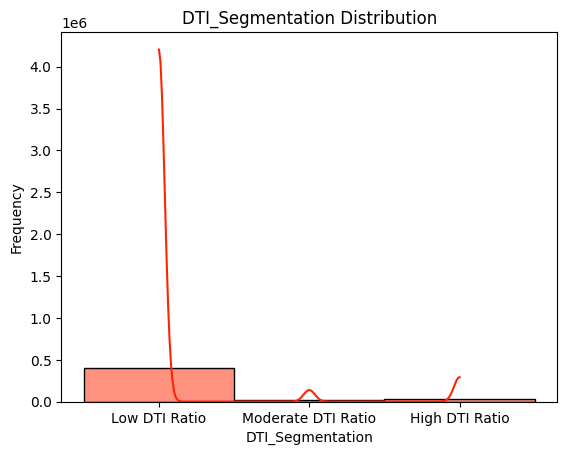

In [176]:
# Distribution of DTI ratio
sns.histplot(data['DTI_Segmentation'], bins=100, kde=True, color = '#FF2400')

# Get y-axis tick positions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('DTI_Segmentation Distribution')
plt.xlabel('DTI_Segmentation')
plt.ylabel('Frequency')

plt.show()


#Low DTI Ratio: A low DTI ratio typically indicates that a borrower has a manageable level of debt relative to their income, DTI below 43%
#Moderate DTI Ratio: DTI ratio falls within a range 36% and 43%, Customers still qualify for credit, but lenders should scrutinize other aspects
#High DTI Ratio: DTI ratio falls within a range above 43%, Customers have hifh risk of default

In [177]:
DTI_Approval_status_classification = data.groupby(['DTI_Segmentation','Approval_status']).size().reset_index(name='Count')
print(DTI_Approval_status_classification)

     DTI_Segmentation Approval_status   Count
0      High DTI Ratio        Approved   25762
1      High DTI Ratio        Declined    1877
2       Low DTI Ratio        Approved  353342
3       Low DTI Ratio        Declined   44540
4  Moderate DTI Ratio        Approved   11998
5  Moderate DTI Ratio        Declined    1038


In [178]:
pivot_DTI = DTI_Approval_status_classification.pivot(index='Approval_status', columns='DTI_Segmentation', values='Count')
print(pivot_DTI)

DTI_Segmentation  High DTI Ratio  Low DTI Ratio  Moderate DTI Ratio
Approval_status                                                    
Approved                   25762         353342               11998
Declined                    1877          44540                1038


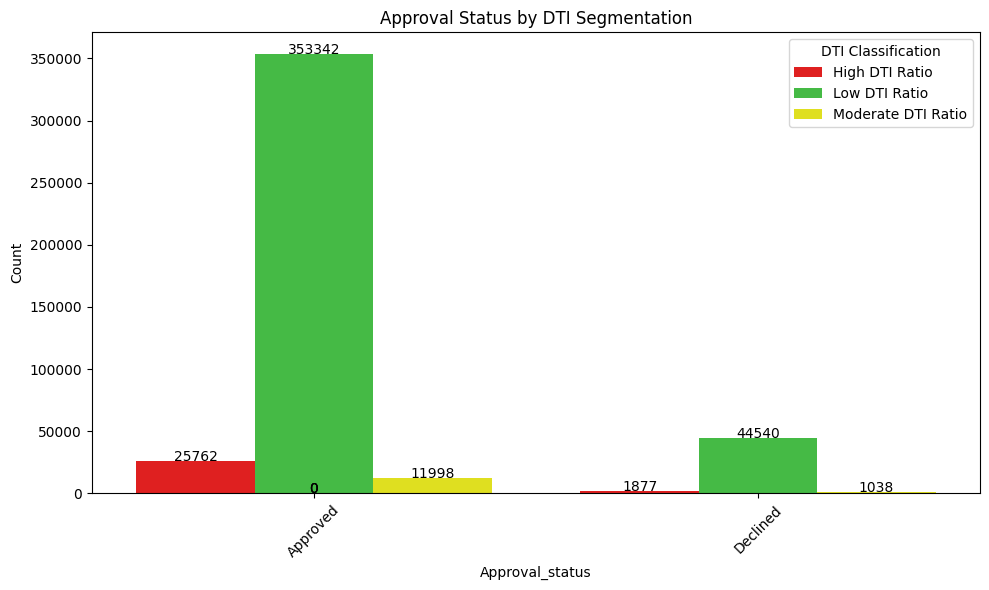

In [179]:
#'Standard': 'green','Normal': '#32CD32', 'Watch': 'yellow', 'Substandard':'chartreuse','Doubtful': 'orange', 'Write_off': 'red'
plt.figure(figsize=(10, 6))
colors = ['red','#32CD32','yellow']
ax = sns.barplot(data=DTI_Approval_status_classification, x='Approval_status', y='Count', hue='DTI_Segmentation',palette=colors)

# Annotate each bar with its count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height -2, f"{int(height)}", ha="center", fontsize=10)

plt.title('Approval Status by DTI Segmentation')
plt.xlabel('Approval_status')
plt.ylabel('Count')
plt.legend(title='DTI Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [180]:
#Approval_status, DTI_segmentation and Credit_risk classification
df0 = data.pivot_table(index='Credit_risk_classification', columns=['Approval_status','DTI_Segmentation'], values='Loan_Amount_Requested',aggfunc='sum')
df0.head()

Approval_status                  Approved                                   \
DTI_Segmentation           High DTI Ratio Low DTI Ratio Moderate DTI Ratio   
Credit_risk_classification                                                   
Doubtful                      17911523251  172026631692         8034284759   
Normal                        81729901273  755617165352        35699213536   
Standard                       2673529904   25621422272         1080652969   
Substandard                   10175196542   98658851265         4527700504   
Watch                         10073966044  102276774128         4655874435   

Approval_status                  Declined                                   
DTI_Segmentation           High DTI Ratio Low DTI Ratio Moderate DTI Ratio  
Credit_risk_classification                                                  
Doubtful                       1467123597   23930702886          815858809  
Normal                         5362249759   88411955229         2774679287  
Standard                        197208812    2710368656          101361817  
Substandard                     867130410   14250922167          445153180  
Watch                           989044307   14580740423          514869201

In [181]:
#Approval_status, DTI_segmentation and Credit_risk classification
df1 = data.pivot_table(index='Credit_risk_classification', columns=['Approval_status','DTI_Segmentation'], values='Loan_Amount_Requested',aggfunc='count')
df1.head()

Approval_status                  Approved                                   \
DTI_Segmentation           High DTI Ratio Low DTI Ratio Moderate DTI Ratio   
Credit_risk_classification                                                   
Doubtful                             3229         44969               1528   
Normal                              14715        197421               6757   
Standard                              481          6701                208   
Substandard                          1850         25667                853   
Watch                                1808         26734                874   

Approval_status                  Declined                                   
DTI_Segmentation           High DTI Ratio Low DTI Ratio Moderate DTI Ratio  
Credit_risk_classification                                                  
Doubtful                              262          6181                149  
Normal                                944         22837                511  
Standard                               35           706                 19  
Substandard                           153          3680                 83  
Watch                                 169          3816                 95

In [182]:
df3 = df1.iloc[:,4:5].head()
df3.head()

Approval_status,Declined
DTI_Segmentation,Low DTI Ratio
Credit_risk_classification,
Doubtful,6181
Normal,22837
Standard,706
Substandard,3680
Watch,3816


In [183]:
df4 = df0.iloc[:,4:5].head()
df4.head()

Approval_status,Declined
DTI_Segmentation,Low DTI Ratio
Credit_risk_classification,
Doubtful,23930702886
Normal,88411955229
Standard,2710368656
Substandard,14250922167
Watch,14580740423


In [184]:
df5 = pd.concat([df3,df4],axis=1)
df5

Approval_status                 Declined              
DTI_Segmentation           Low DTI Ratio Low DTI Ratio
Credit_risk_classification                            
Doubtful                            6181   23930702886
Normal                             22837   88411955229
Standard                             706    2710368656
Substandard                         3680   14250922167
Watch                               3816   14580740423

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


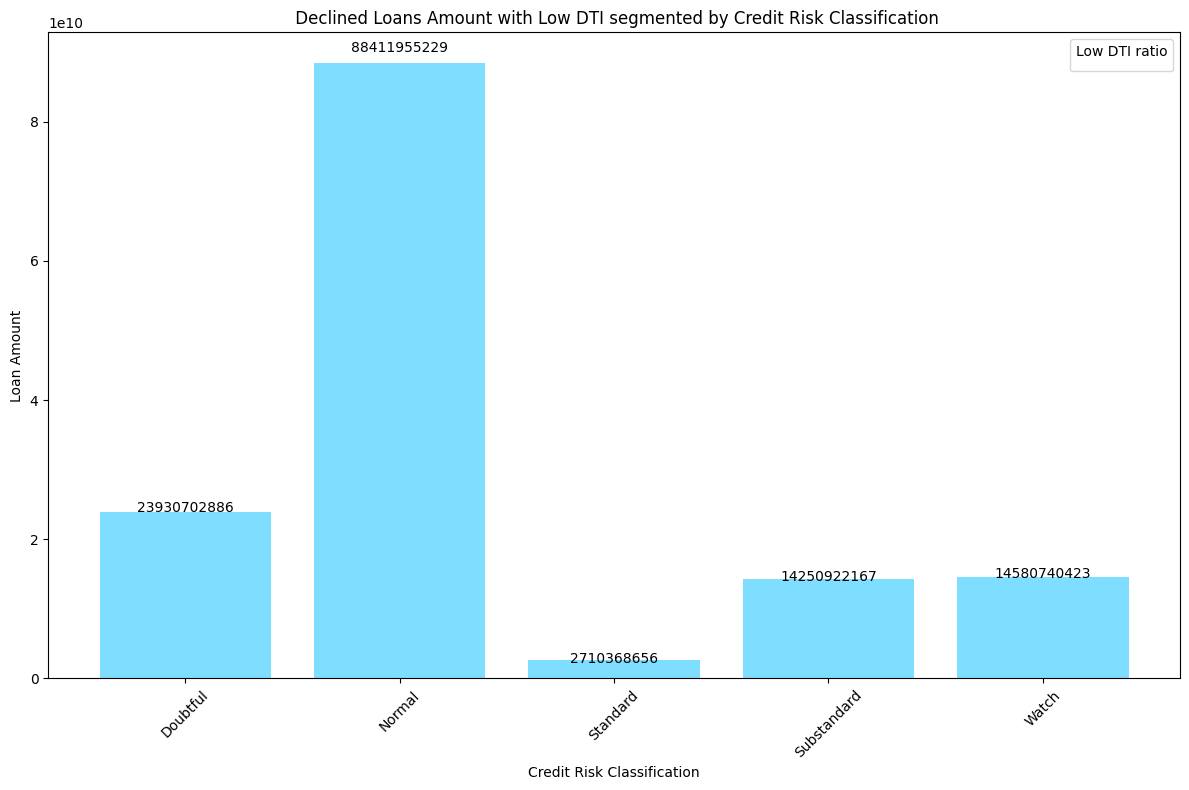

In [185]:
# Data
index = ['Doubtful', 'Normal', 'Standard','Substandard','Watch']
columns_loan = ['Loan']
data_loan = [[23930702886, 88411955229, 2710368656,14250922167,14580740423]]

# Convert data to DataFrame
df_loan = pd.DataFrame(data_loan, columns=index)

# Custom colors
custom_colors = ['#00BFFF']

# Plot
plt.figure(figsize=(12, 8))

# Plot the loan amount
plt.bar(index, df_loan.iloc[0], color=custom_colors[0], label='', alpha=0.5)

# Add data labels
for i, category in enumerate(index):
    plt.text(i, df_loan.iloc[0, i] + df_loan.iloc[0, i] / 40, str(df_loan.iloc[0, i]), ha='center', va='center', color='black')


plt.title(' Declined Loans Amount with Low DTI segmented by Credit Risk Classification')
plt.xlabel('Credit Risk Classification')
plt.ylabel('Loan Amount')
plt.legend(title='Low DTI ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


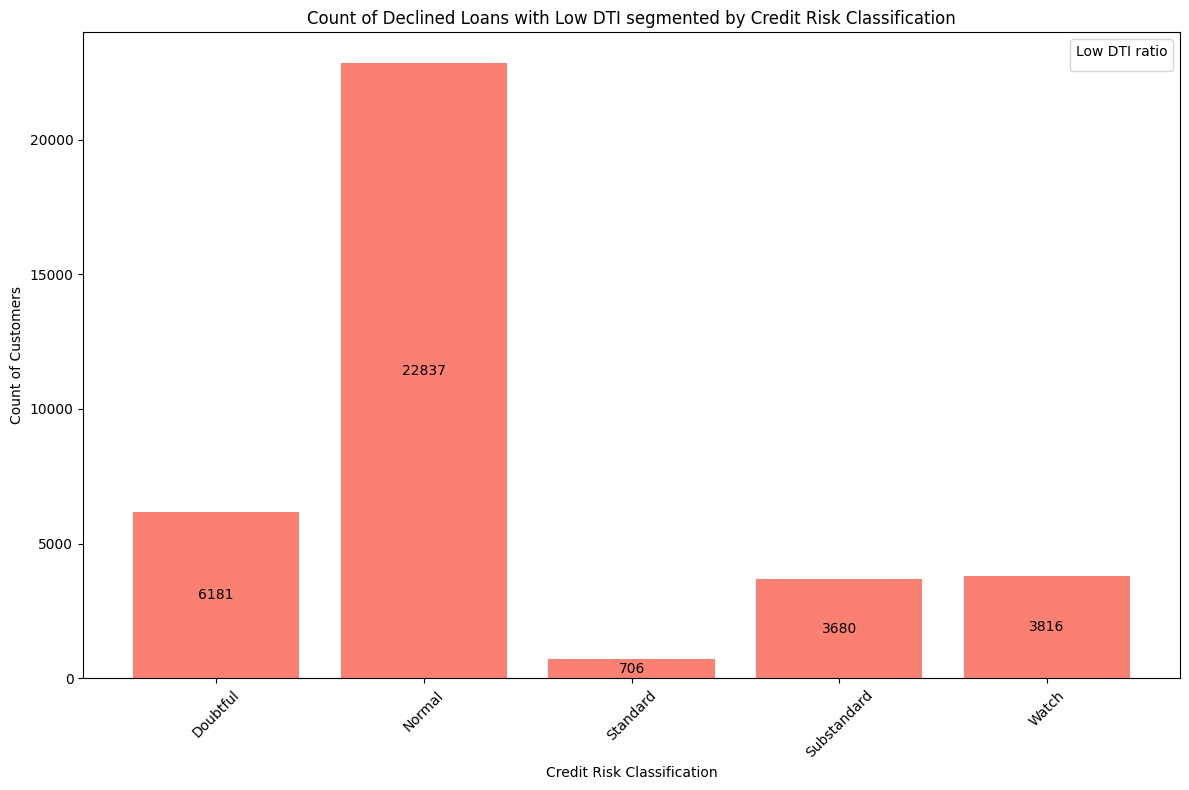

In [186]:
#Data
index = ['Doubtful', 'Normal', 'Standard','Substandard','Watch']
columns_count = ['Count']
data_count = [[6181, 22837,706,3680,3816]]
# Convert data to DataFrame
df_count = pd.DataFrame(data_count, columns=index)
# Custom colors
custom_colors = ['salmon']
# Plot
plt.figure(figsize=(12, 8))
# Plot the count of customers
plt.bar(index, df_count.iloc[0], color=custom_colors[0], label='')


# Add data labels
for i, category in enumerate(index):
    plt.text(i, df_count.iloc[0, i] / 2, str(df_count.iloc[0, i]), ha='center', va='center', color='black')

plt.title('Count of Declined Loans with Low DTI segmented by Credit Risk Classification')
plt.xlabel('Credit Risk Classification')
plt.ylabel('Count of Customers')
plt.legend(title='Low DTI ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [187]:
data.head(2)

,Loan_id,Customer_id,Gender,Dependants,Education,Employment_status,Marital_status,Politically_Exposed_person,Type_of_loan,Maximum_Days_past_due_on_previous_loans,...,Disbursement_Date,Tenure,Approval_status,Age,Loan_Amount_in_millions,Credit_risk_classification,Year,Age_Bracket,DTI,DTI_Segmentation
0,5008804,337525,M,0,Higher education,Working,Civil marriage,Y,AUTO LOAN,2,...,2015-05-24,25,Approved,32.9,6.150,Normal,2015,Age 30 to 40,5.8,Low DTI Ratio
1,5008805,358141,M,0,Higher education,Working,Civil marriage,Y,BUSINESS GROWTH LOAN,14,...,2021-11-12,25,Approved,32.9,2.416,Normal,2021,Age 30 to 40,2.3,Low DTI Ratio


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 24 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Loan_id                                  438557 non-null  object        
 1   Customer_id                              438557 non-null  object        
 2   Gender                                   438557 non-null  object        
 3   Dependants                               438557 non-null  int64         
 4   Education                                438557 non-null  object        
 5   Employment_status                        438557 non-null  object        
 6   Marital_status                           438557 non-null  object        
 7   Politically_Exposed_person               438557 non-null  object        
 8   Type_of_loan                             438557 non-null  object        
 9   Maximum_Days_past_due_on_p

In [189]:
columnsss = ['Maximum_Days_past_due_on_previous_loans','Loan_Amount_in_millions','Year','DTI','Age']
data = data.drop(columns = columnsss)

In [190]:
data.head(2)

,Loan_id,Customer_id,Gender,Dependants,Education,Employment_status,Marital_status,Politically_Exposed_person,Type_of_loan,Place_of_residence,Monthly_income(Ugx),Loan_Amount_Requested,Customer_Type,Disbursement_Date,Tenure,Approval_status,Credit_risk_classification,Age_Bracket,DTI_Segmentation
0,5008804,337525,M,0,Higher education,Working,Civil marriage,Y,AUTO LOAN,Rented apartment,4275000.0,6150000,Business,2015-05-24,25,Approved,Normal,Age 30 to 40,Low DTI Ratio
1,5008805,358141,M,0,Higher education,Working,Civil marriage,Y,BUSINESS GROWTH LOAN,Rented apartment,4275000.0,2416000,Business,2021-11-12,25,Approved,Normal,Age 30 to 40,Low DTI Ratio


In [191]:
data = data.drop(columns=['Loan_id', 'Customer_id'])

In [192]:
# Convert Disbursement_Date to datetime format
data['Disbursement_Date'] = pd.to_datetime(data['Disbursement_Date'],format='%d/%m/%Y')

# Extract year, month, and day
data['Disbursement_Year'] = data['Disbursement_Date'].dt.year
data['Disbursement_Month'] = data['Disbursement_Date'].dt.month
data['Disbursement_Day'] = data['Disbursement_Date'].dt.day

# Drop the original Disbursement_Date column
data.drop(columns=['Disbursement_Date'], inplace=True)

In [193]:
data.head(2)

,Gender,Dependants,Education,Employment_status,Marital_status,Politically_Exposed_person,Type_of_loan,Place_of_residence,Monthly_income(Ugx),Loan_Amount_Requested,Customer_Type,Tenure,Approval_status,Credit_risk_classification,Age_Bracket,DTI_Segmentation,Disbursement_Year,Disbursement_Month,Disbursement_Day
0,M,0,Higher education,Working,Civil marriage,Y,AUTO LOAN,Rented apartment,4275000.0,6150000,Business,25,Approved,Normal,Age 30 to 40,Low DTI Ratio,2015,5,24
1,M,0,Higher education,Working,Civil marriage,Y,BUSINESS GROWTH LOAN,Rented apartment,4275000.0,2416000,Business,25,Approved,Normal,Age 30 to 40,Low DTI Ratio,2021,11,12


In [194]:
#Mapping Ordinal data
map1 = {"Standard":5,"Normal":4,"Substandard":3,"Watch":2,"Doubtful":1,"Write_off":0}
data['Credit_risk_classification'] = data['Credit_risk_classification'].map(map1)

map2 = {"Approved":1,"Declined":0}
data['Approval_status'] = data['Approval_status'].map(map2)

map3 = {"Low DTI Ratio":3,"Moderate DTI Ratio":2,"High DTI Ratio":1}
data['DTI_Segmentation'] = data['DTI_Segmentation'].map(map3)


In [195]:
data.head(2)

,Gender,Dependants,Education,Employment_status,Marital_status,Politically_Exposed_person,Type_of_loan,Place_of_residence,Monthly_income(Ugx),Loan_Amount_Requested,Customer_Type,Tenure,Approval_status,Credit_risk_classification,Age_Bracket,DTI_Segmentation,Disbursement_Year,Disbursement_Month,Disbursement_Day
0,M,0,Higher education,Working,Civil marriage,Y,AUTO LOAN,Rented apartment,4275000.0,6150000,Business,25,1,4,Age 30 to 40,3,2015,5,24
1,M,0,Higher education,Working,Civil marriage,Y,BUSINESS GROWTH LOAN,Rented apartment,4275000.0,2416000,Business,25,1,4,Age 30 to 40,3,2021,11,12


In [196]:
# Separate features and target variable
X_matrix = data.drop(columns=['Approval_status'])

# Define feature types
numeric_features = data.select_dtypes(exclude='object').columns
categorical_features = data.select_dtypes(include='object').columns



In [197]:
print(numeric_features)

Index(['Dependants', 'Monthly_income(Ugx)', 'Loan_Amount_Requested', 'Tenure',
       'Approval_status', 'Credit_risk_classification', 'DTI_Segmentation',
       'Disbursement_Year', 'Disbursement_Month', 'Disbursement_Day'],
      dtype='object')


In [198]:
print(categorical_features)

Index(['Gender', 'Education', 'Employment_status', 'Marital_status',
       'Politically_Exposed_person', 'Type_of_loan', 'Place_of_residence',
       'Customer_Type', 'Age_Bracket'],
      dtype='object')


In [199]:
#Dependent variable, y-vector
y = data['Approval_status']

In [200]:
#Indepndent variables, X-matrix
from sklearn.preprocessing import OneHotEncoder

# Define the columns to be one-hot encoded
columns_to_encode = data.select_dtypes(include='object').columns

encoder = OneHotEncoder(handle_unknown='ignore')

X_encoded = encoder.fit_transform(X_matrix[columns_to_encode])

X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

X_preprocessed = pd.concat([X_matrix.drop(columns=columns_to_encode), X_encoded_df], axis=1)

In [201]:
X_preprocessed.head()

,Dependants,Monthly_income(Ugx),Loan_Amount_Requested,Tenure,Credit_risk_classification,DTI_Segmentation,Disbursement_Year,Disbursement_Month,Disbursement_Day,Gender_F,...,Customer_Type_Medicine staff,Customer_Type_Private service staff,Customer_Type_Realty agents,Customer_Type_Sales staff,Customer_Type_Secretaries,Customer_Type_Security staff,Customer_Type_Waiters/barmen staff,Age_Bracket_Age 20 to 30,Age_Bracket_Age 30 to 40,Age_Bracket_Age > 40
0,0,4275000.0,6150000,25,4,3,2015,5,24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,4275000.0,2416000,25,4,3,2021,11,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1125000.0,2446000,23,4,3,2022,6,12,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,2700000.0,5840000,25,4,3,2015,11,12,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,2700000.0,2318000,25,4,3,2018,11,12,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [202]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X =st.fit_transform(X_preprocessed)

In [203]:
X.shape

(438557, 69)

In [204]:
X

array([[-0.5896003 ,  2.17985335,  1.21214439, ..., -0.38779616,
         1.57604858, -1.18056188],
       [-0.5896003 ,  2.17985335, -0.87797345, ..., -0.38779616,
         1.57604858, -1.18056188],
       [-0.5896003 , -0.68147287, -0.86118086, ..., -0.38779616,
        -0.63449821,  0.84705428],
       ...,
       [-0.5896003 , -1.21286202,  0.56936374, ...,  2.57867433,
        -0.63449821, -1.18056188],
       [-0.5896003 , -1.04935767, -0.13053578, ..., -0.38779616,
        -0.63449821,  0.84705428],
       [-0.5896003 , -0.59972069, -1.09801237, ..., -0.38779616,
        -0.63449821,  0.84705428]])

In [205]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {round(accuracy_score(y_test,y_pred),2)}%")
    

In [206]:
#Attaining model Accuracy for all the models

In [207]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.89%


In [208]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model_val(model,X,y)


c:\Users\abyaruhanga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis() accuracy is 0.71%


In [209]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model_val(model,X,y)

ExtraTreesClassifier(random_state=42) accuracy is 0.91%


In [210]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model_val(model,X,y)

GaussianNB() accuracy is 0.81%


In [211]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
model_val(model,X,y)

RidgeClassifier() accuracy is 0.89%


In [212]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy="most_frequent")
model_val(model,X,y)

DummyClassifier(strategy='most_frequent') accuracy is 0.89%


In [213]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.88%


In [214]:
#Gradient Boosting Classifier model

from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.89%


In [215]:
#Long Short-Term Memory (LSTM)

In [216]:
Lstm_X_matrix = X_matrix
Lstm_y = y

In [217]:
from sklearn.preprocessing import OneHotEncoder


Lstm_columns_to_encode = Lstm_X_matrix.select_dtypes(include='object').columns

encoder = OneHotEncoder(handle_unknown='ignore')

Lstm_X_encoded = encoder.fit_transform(Lstm_X_matrix[Lstm_columns_to_encode])

Lstm_X_encoded_df = pd.DataFrame(Lstm_X_encoded.toarray(), columns=encoder.get_feature_names_out(Lstm_columns_to_encode))

Lstm_X_preprocessed = pd.concat([Lstm_X_matrix.drop(columns=Lstm_columns_to_encode), Lstm_X_encoded_df], axis=1)

Lstm_X_preprocessed.head()


from sklearn.preprocessing import StandardScaler
st = StandardScaler()
Lstm_X =st.fit_transform(Lstm_X_preprocessed)

In [218]:
Lstm_X

array([[-0.5896003 ,  2.17985335,  1.21214439, ..., -0.38779616,
         1.57604858, -1.18056188],
       [-0.5896003 ,  2.17985335, -0.87797345, ..., -0.38779616,
         1.57604858, -1.18056188],
       [-0.5896003 , -0.68147287, -0.86118086, ..., -0.38779616,
        -0.63449821,  0.84705428],
       ...,
       [-0.5896003 , -1.21286202,  0.56936374, ...,  2.57867433,
        -0.63449821, -1.18056188],
       [-0.5896003 , -1.04935767, -0.13053578, ..., -0.38779616,
        -0.63449821,  0.84705428],
       [-0.5896003 , -0.59972069, -1.09801237, ..., -0.38779616,
        -0.63449821,  0.84705428]])

In [219]:

Lstm_X_train, Lstm_X_test, Lstm_y_train, Lstm_y_test = train_test_split(Lstm_X, Lstm_y, test_size=0.2, random_state=42)


Lstm_X_train_reshaped = Lstm_X_train.reshape(Lstm_X_train.shape[0], 1, Lstm_X_train.shape[1])
Lstm_X_test_reshaped = Lstm_X_test.reshape(Lstm_X_test.shape[0], 1, Lstm_X_test.shape[1])

model = Sequential()
model.add(LSTM(units=50, input_shape=(Lstm_X_train_reshaped.shape[1], Lstm_X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))  


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(Lstm_X_train_reshaped, Lstm_y_train, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2


c:\Users\abyaruhanga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8772/8772 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8857 - loss: 0.3440 - val_accuracy: 0.8938 - val_loss: 0.3181
Epoch 2/2
8772/8772 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8904 - loss: 0.3211 - val_accuracy: 0.8939 - val_loss: 0.3145


In [220]:
#Model evaluation for LSTM
loss, accuracy = model.evaluate(Lstm_X_test_reshaped, Lstm_y_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

2741/2741 ━━━━━━━━━━━━━━━━━━━━ 2s 648us/step - accuracy: 0.8912 - loss: 0.3207
Accuracy on test set: 89.19%


In [221]:
#Gated Recurrent Unit (GRU)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [222]:
GRU_X_matrix = X_matrix
GRU_y = y

In [223]:
from sklearn.preprocessing import OneHotEncoder


GRU_columns_to_encode = GRU_X_matrix.select_dtypes(include='object').columns

encoder = OneHotEncoder(handle_unknown='ignore')

GRU_X_encoded = encoder.fit_transform(GRU_X_matrix[GRU_columns_to_encode])

GRU_X_encoded_df = pd.DataFrame(GRU_X_encoded.toarray(), columns=encoder.get_feature_names_out(GRU_columns_to_encode))

GRU_X_preprocessed = pd.concat([GRU_X_matrix.drop(columns=GRU_columns_to_encode), GRU_X_encoded_df], axis=1)

GRU_X_preprocessed.head()


from sklearn.preprocessing import StandardScaler
st = StandardScaler()
GRU_X =st.fit_transform(GRU_X_preprocessed)

In [224]:

GRU_X_train, GRU_X_test, GRU_y_train, GRU_y_test = train_test_split(GRU_X, GRU_y, test_size=0.2, random_state=42)


GRU_X_train_reshaped = GRU_X_train.reshape(GRU_X_train.shape[0], 1, GRU_X_train.shape[1])
GRU_X_test_reshaped = GRU_X_test.reshape(GRU_X_test.shape[0], 1, GRU_X_test.shape[1])


model = Sequential()
model.add(GRU(units=50, input_shape=(GRU_X_train_reshaped.shape[1], GRU_X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid')) 


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(GRU_X_train_reshaped, GRU_y_train, epochs=2, batch_size=32, validation_split=0.2)


Epoch 1/2


c:\Users\abyaruhanga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8772/8772 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8858 - loss: 0.3411 - val_accuracy: 0.8938 - val_loss: 0.3198
Epoch 2/2
8772/8772 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8910 - loss: 0.3222 - val_accuracy: 0.8938 - val_loss: 0.3148


In [225]:
#Model evaluation for GRU
loss, accuracy = model.evaluate(GRU_X_test_reshaped, GRU_y_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

2741/2741 ━━━━━━━━━━━━━━━━━━━━ 2s 659us/step - accuracy: 0.8909 - loss: 0.3207
Accuracy on test set: 89.15%


In [226]:
#Deep RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [227]:
Deep_X_matrix = X_matrix
Deep_y = y

In [228]:
from sklearn.preprocessing import OneHotEncoder


Deep_columns_to_encode = Deep_X_matrix.select_dtypes(include='object').columns

encoder = OneHotEncoder(handle_unknown='ignore')

Deep_X_encoded = encoder.fit_transform(Deep_X_matrix[Deep_columns_to_encode])

Deep_X_encoded_df = pd.DataFrame(Deep_X_encoded.toarray(), columns=encoder.get_feature_names_out(Deep_columns_to_encode))

Deep_X_preprocessed = pd.concat([Deep_X_matrix.drop(columns=Deep_columns_to_encode), Deep_X_encoded_df], axis=1)

Deep_X_preprocessed.head()


from sklearn.preprocessing import StandardScaler
st = StandardScaler()
Deep_X =st.fit_transform(Deep_X_preprocessed)

In [229]:
Deep_X_train, Deep_X_test, Deep_y_train, Deep_y_test = train_test_split(Deep_X, Deep_y, test_size=0.2, random_state=42)


Deep_X_train_reshaped = Deep_X_train.reshape(Deep_X_train.shape[0], 1, Deep_X_train.shape[1])
Deep_X_test_reshaped = Deep_X_test.reshape(Deep_X_test.shape[0], 1, Deep_X_test.shape[1])


model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(Deep_X_train_reshaped.shape[1], Deep_X_train_reshaped.shape[2])))
model.add(SimpleRNN(units=50))  
model.add(Dense(1, activation='sigmoid'))  


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(Deep_X_train_reshaped, Deep_y_train, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2


c:\Users\abyaruhanga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8772/8772 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8821 - loss: 0.3450 - val_accuracy: 0.8937 - val_loss: 0.3207
Epoch 2/2
8772/8772 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8915 - loss: 0.3231 - val_accuracy: 0.8938 - val_loss: 0.3172


In [230]:
#Model evaluation for Deep RNN
loss, accuracy = model.evaluate(Deep_X_test_reshaped, Deep_y_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

2741/2741 ━━━━━━━━━━━━━━━━━━━━ 2s 709us/step - accuracy: 0.8909 - loss: 0.3233
Accuracy on test set: 89.15%


In [231]:
#LogisticRegression score : 89%
#QuadraticDiscriminantAnalysis score : 71%
#ExtraTreesClassifier score : 91%
#GaussianNB score : 81%
#RidgeClassifier score : 89%
#DummyClassifier score : 89%
#DecisionTreeClassifier score : 88%
#GradientBoostingClassifier : 89%
#Long Short-Term Memory (LSTM) : 89.79%
#Gated Recurrent Unit (GRU): 89.59%
#Deep RNN : 89.90%

In [232]:
#Save the Model with best accuracy

ETC = ExtraTreesClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [233]:
ETC.fit(X,y)

ExtraTreesClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                     n_estimators=270)

In [234]:
#To do credit risk assessment on a customer's application
import joblib

In [235]:

joblib.dump(ETC,'Credit_scoring')

['Credit_scoring']

In [236]:
model = joblib.load('Credit_scoring')

In [237]:
#Predicting a new loan Application

In [238]:
Prediction_data = pd.DataFrame({

    'Gender': ['M'],
    'Dependants': [0],
    'Education': ["Higher education"],
    'Employment_status': ['Working'],
    'Marital_status': ['Single / not married'],
    'Politically_Exposed_person': ['N'],
    'Type_of_loan': ["SALARY LOAN"],
    'Place_of_residence': ["House / apartment"],
    'Monthly_income(Ugx)': [6750000],
    'Loan_Amount_Requested': [2204298],
    "Customer_Type": ["Core staff"],
    'Tenure': [14],
    "Credit_risk_classification": [4],
    "Age_Bracket":["Age 20 to 30"],
    "DTI_Segmentation":[3],
    "Disbursement_Year": [2016],
    "Disbursement_Month": [1],
    "Disbursement_Day": [25]
})

In [239]:
Prediction_data

,Gender,Dependants,Education,Employment_status,Marital_status,Politically_Exposed_person,Type_of_loan,Place_of_residence,Monthly_income(Ugx),Loan_Amount_Requested,Customer_Type,Tenure,Credit_risk_classification,Age_Bracket,DTI_Segmentation,Disbursement_Year,Disbursement_Month,Disbursement_Day
0,M,0,Higher education,Working,Single / not married,N,SALARY LOAN,House / apartment,6750000,2204298,Core staff,14,4,Age 20 to 30,3,2016,1,25


In [240]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns to be one-hot encoded
columns_to_encode = Prediction_data.select_dtypes(include='object').columns
print(columns_to_encode)

Index(['Gender', 'Education', 'Employment_status', 'Marital_status',
       'Politically_Exposed_person', 'Type_of_loan', 'Place_of_residence',
       'Customer_Type', 'Age_Bracket'],
      dtype='object')


In [241]:
encoder = OneHotEncoder(handle_unknown='ignore')

Prediction_data_encoded = encoder.fit_transform(Prediction_data[columns_to_encode])

Prediction_data_encoded_df = pd.DataFrame(Prediction_data_encoded.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

Prediction_data_preprocessed = pd.concat([Prediction_data.drop(columns=columns_to_encode), Prediction_data_encoded_df], axis=1)

In [242]:
Prediction_data_preprocessed.head()

,Dependants,Monthly_income(Ugx),Loan_Amount_Requested,Tenure,Credit_risk_classification,DTI_Segmentation,Disbursement_Year,Disbursement_Month,Disbursement_Day,Gender_M,Education_Higher education,Employment_status_Working,Marital_status_Single / not married,Politically_Exposed_person_N,Type_of_loan_SALARY LOAN,Place_of_residence_House / apartment,Customer_Type_Core staff,Age_Bracket_Age 20 to 30
0,0,6750000,2204298,14,4,3,2016,1,25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [243]:
# Create an empty dataframe with the same columns as X_preprocessed
final_prediction_df = pd.DataFrame(columns=X_preprocessed.columns)

# Iterate over the columns in new_df and replace the values with those from Prediction_data_preprocessed
for col in final_prediction_df.columns:
    if col in Prediction_data_preprocessed.columns:
        final_prediction_df[col] = Prediction_data_preprocessed[col]
    else:
        final_prediction_df[col] = 0

In [244]:
final_prediction_df.head()

,Dependants,Monthly_income(Ugx),Loan_Amount_Requested,Tenure,Credit_risk_classification,DTI_Segmentation,Disbursement_Year,Disbursement_Month,Disbursement_Day,Gender_F,...,Customer_Type_Medicine staff,Customer_Type_Private service staff,Customer_Type_Realty agents,Customer_Type_Sales staff,Customer_Type_Secretaries,Customer_Type_Security staff,Customer_Type_Waiters/barmen staff,Age_Bracket_Age 20 to 30,Age_Bracket_Age 30 to 40,Age_Bracket_Age > 40
0,0,6750000,2204298,14,4,3,2016,1,25,0,...,0,0,0,0,0,0,0,1.0,0,0


In [245]:
# Make predictions using best trained model, from all above
result = model.predict(final_prediction_df)

c:\Users\abyaruhanga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


In [246]:
if result==1:
    print(f"Your Loan Application of {final_prediction_df['Loan_Amount_Requested'].iloc[0]} has been Approved")
else:
    print(f"Your Loan Application of {final_prediction_df['Loan_Amount_Requested'].iloc[0]} has been Declined") 


Your Loan Application of 2204298 has been Approved


In [250]:
#Graphical User Interface (GUI)

In [254]:
Prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      1 non-null      object
 1   Dependants                  1 non-null      int64 
 2   Education                   1 non-null      object
 3   Employment_status           1 non-null      object
 4   Marital_status              1 non-null      object
 5   Politically_Exposed_person  1 non-null      object
 6   Type_of_loan                1 non-null      object
 7   Place_of_residence          1 non-null      object
 8   Monthly_income(Ugx)         1 non-null      int64 
 9   Loan_Amount_Requested       1 non-null      int64 
 10  Customer_Type               1 non-null      object
 11  Tenure                      1 non-null      int64 
 12  Credit_risk_classification  1 non-null      int64 
 13  Age_Bracket                 1 non-null      object
 14

In [261]:
feature_names_encoded = encoder.get_feature_names_out()
print(feature_names_encoded)

['Gender_M' 'Education_Higher education' 'Employment_status_Working'
 'Marital_status_Single / not married' 'Politically_Exposed_person_N'
 'Type_of_loan_SALARY LOAN' 'Place_of_residence_House / apartment'
 'Customer_Type_Core staff' 'Age_Bracket_Age 20 to 30']
